## Likelihood

# Intuition
A likelihood quantifies how well a statistical model explains observed data. In Bayesian terms, it is the key ingredient in updating prior beliefs to posterior beliefs.

**FIGURE PLACEHOLDER:** ![Likelihood Intuition Cartoon](image_placeholder)

# Definition

- The **"likelihood"** for a model is defined as the probability of the data under the model. That is, given data $x$, the likelihood for a fully-specified (discrete) model $M$ is defined as

$$
L(M)=p(x|M)
$$
where $p(⋅|M)$ denotes the probability mass function (for discrete data) or probability density function (for continuous data) for model $M$.


# Example

## Example 1 -- allele frequency of elephant

### Description of the question

Here we use an example from [Matthew Stephen's notes](http://stephens999.github.io/fiveMinuteStats/likelihood_ratio_simple_models.html).

> [Technical Note: to simplify this problem I have assumed that elephants are haploid, which they are not. If you do not know what this means you should simply ignore this comment.]
>
> There are two subspecies of African Elephant: savannah and forest elephants, which differ in their genetic makeup. Interpol have seized an illegally-smuggled elephant tusk, and they want to know which subspecies of elephant the tusk came from. To try to answer this they collect DNA from the tusk and measure it at a number of locations (“markers” in genetics jargon) along the elephant genome. At each marker the DNA can be one of two types (“alleles” in genetics jargon), which for simplicity we will label 0 and 1. So the available data on the tusk might look something like this.
> 
> |Marker|Allele|
|:--:|:--:|
|1|	1|
|2|0|
|3|1|
|4|0|
|5|0|
|6|1|

In [1]:
x = c(1,0,1,0,0,1)

> Interpol also have information on the frequency of each allele in each of the two subspecies - this was obtained by measuring the DNA of a large number of savanna elephants and a large number of forest elephants. We will use $f_{S{j}}$ and $f_{F{j}}$ to denote the frequency of “1” allele at marker j in savanna and forest elephants respectively (and since there are only two alleles, the frequency of the 0 allele is $1−f_{S{j}}$ and $1−f_{F{j}}$). Here is a table of this information.
>
> | marker | $f_S$  | $f_F$  |
|:--------:|:-----:|:-----:|
| 1      | 0.40 | 0.80 |
| 2      | 0.12 | 0.20 |
| 3      | 0.21 | 0.11 |
| 4      | 0.12 | 0.17 |
| 5      | 0.02 | 0.23 |
| 6      | 0.32 | 0.25 |


In [2]:
fS = c(0.40, 0.12,0.21,0.12,0.02,0.32)
fF = c(0.8,0.2,0.11,0.17,0.23,0.25)

> The question before us is: **Which subspecies of elephant did the tusk come from, and how confident should we be in this conclusion?**

### Solution

> We can phrase this problem as a “model comparison” problem. We have data $X=x$ from our tusk, and we have two different models for how those data might have arisen: it could have been sampled from a savanna elephant, or it could have been sampled from a forest elephant. We will use $M_S$ and $M_F$ as shorthand for these two models. A key point is that these two models imply different probability distributions for $X$: some values of $X$ are more common under $M_S$ and others are more common under $M_F$.
>
> Denoting the probability mass functions of these two distributions p(⋅|MS) and p(⋅|MF), and assuming the data at different markers are independent, these probability distributions are:
> $$
p(x|M_S)=\prod_j f_{S_j}^{x_j}(1−f_{S_j})^{1−x_j}
$$
>
> and
> $$
p(x|M_F)=\prod_j f_{F_j}^{x_j}(1−f_{F_j})^{1−x_j}
$$
>>
>
> where the values of $f_S$ and $f_F$ are given in the table above.
>
> The key idea to introduce here is that a useful summary of how strongly the data $x$ support one model vs another model is given by the “likelihood ratio” (LR).

**So before we drive ourselves into the likelihood ratio of two methods, in this notebook, let's focus on the likelihood:**

The **"likelihood"** for a model is defined as the probability of the data under the model. That is, given data $x$, the likelihood for a fully-specified (discrete) model M is defined as

$$
L(M_S)=p(x|M_S)=\prod_j f_{S_j}^{x_j}(1−f_{S_j})^{1−x_j} \\
L(M_F)=p(x|M_F)=\prod_j f_{F_j}^{x_j}(1−f_{F_j})^{1−x_j}
$$
where $p(⋅|M)$ denotes the probability mass function for model $M$.

In [3]:
L = function(f,x){ prod(f^x*(1-f)^(1-x)) }

In [4]:
L(fS,x)

[1] 0.02039955

In [5]:
L(fF,x)

[1] 0.01124816

## Example 2 -- concentration of protein in the blood 

### Description

> A medical screening test for a disease involves measuring the concentration ($X$) of a protein in the blood. In normal individuals $X$ has a Gamma distribution with mean 1 and shape 2. In diseased individuals the protein becomes elevated, and $X$ has a Gamma distribution with mean 2 and shape 2. Plotting the probability density functions of these distributions yields:
> 

Suppose that for a particular individual we observe $X=4.02$. Then the question is

**Is this individual from the normal group or the diseased group?**

### Solution

The likelihood for the two models -- normal individual group ($M_0$) or diseased individual group ($M_1$) --- can therefore be calculated as:


$$
L(M_0)=p(x|M_0)= \frac{\beta_0^{\alpha_0} x^{\alpha_0 - 1} e^{-\beta_0 x}}{\Gamma(\alpha_0)} = \frac{2^2 \cdot 4.02^{2 - 1} e^{-2 \cdot 4.02}}{\Gamma(2)}\\
L(M_1)=p(x|M_1)= \frac{\beta_1^{\alpha_1} x^{\alpha_1 - 1} e^{-\beta_1 x}}{\Gamma(\alpha_1)} = \frac{1^2 \cdot 4.02^{2 - 1} e^{-1 \cdot 4.02}}{\Gamma(2)}
$$


The difference here is that instead of the **probability mass functions** that we used in the first example, here we use the **probability density functions (PDF)** of Gamma distribution:

$$
f(x; \alpha, \beta) = \frac{\beta^\alpha x^{\alpha - 1} e^{-\beta x}}{\Gamma(\alpha)}, \quad x > 0
$$


where:
- $\alpha$ is the shape parameter,
- $\beta$ is the rate parameter ($\beta = \frac{1}{\theta}$, where $\theta$ is the scale parameter),
- $\Gamma(\alpha)$ is the Gamma function.

In [6]:
X_val=4.02

In R we can use the [dgamma](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/GammaDist.html) function to calculate the PDF of gamma function at data $x$.

In [7]:
# dgamma(x, shape, rate = 1, scale = 1/rate, log = FALSE) returns the Density for the Gamma distribution with parameters shape and scale at x
y0_val = dgamma(X_val,scale=0.5,shape=2)
y1_val = dgamma(X_val,scale=1,shape=2)

This can be visualized from the figure below. 

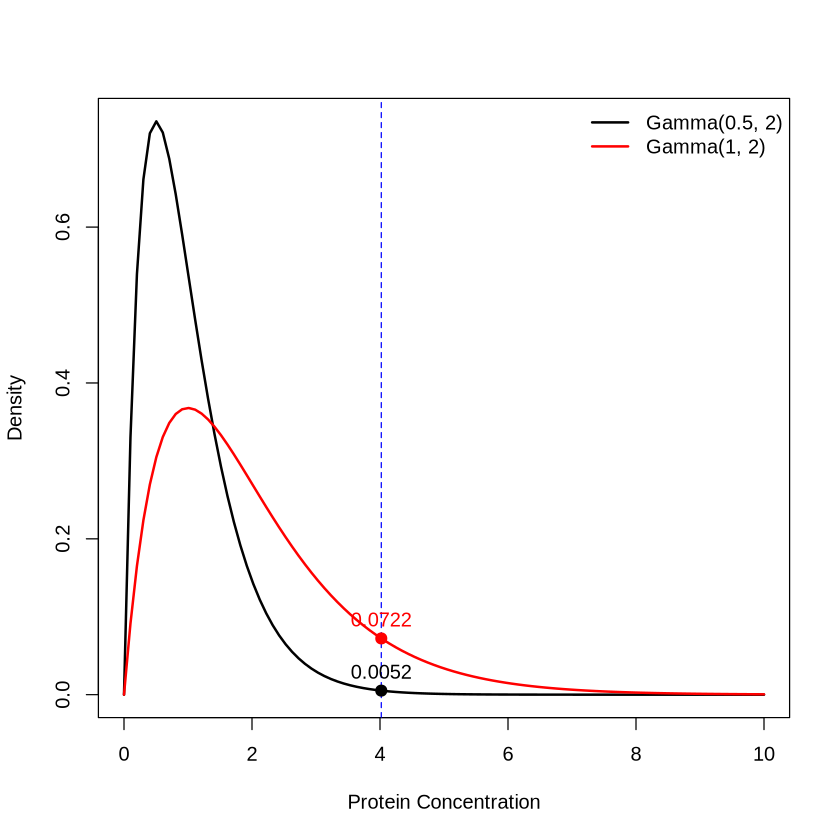

In [8]:
x <- seq(0, 10, length = 100)

# Compute density values
y0 <- dgamma(x, scale = 0.5, shape = 2)
y1 <- dgamma(x, scale = 1, shape = 2)

# Plot the first Gamma density
plot(x, y0, type = "l", xlab = "Protein Concentration", ylab = "Density",
     col = "black", lwd = 2, ylim = c(0, max(y0, y1)))

# Add the second Gamma density
lines(x, y1, col = "red", lwd = 2)

# Add a vertical line at x = 4.02
abline(v = X_val, lty = 2, col = "blue")

# Mark the corresponding points
points(X_val, y0_val, col = "black", pch = 19, cex = 1.2) # normal group
points(X_val, y1_val, col = "red", pch = 19, cex = 1.2) # diseased group

# Add text labels near the points
text(X_val, y0_val, labels = round(y0_val, 4), pos = 3, col = "black")
text(X_val, y1_val, labels = round(y1_val, 4), pos = 3, col = "red")

# Add legend
legend("topright", legend = c("Gamma(0.5, 2)", "Gamma(1, 2)"), 
       col = c("black", "red"), lwd = 2, bty = "n")


## Example 3 -- asociation between concentration level for a protein and BMI

### Description


In this example, we compare two models to assess the effect of a genetic variant on a quantitative trait, such as height. The models are:

1. **Null model**: This model assumes that the genetic variant has no effect on the trait. Assumes the trait is normally distributed with mean 0 (no genetic effect) and standard deviation $\sigma$.
$$
y_i \sim \mathcal{N}(0, \sigma^2)
$$
2. **Alternative model**: This model assumes that the genetic variant has an effect on the trait. Assumes the trait is normally distributed with mean 1 (genetic effect), where $x_i$ is the genotype (coded as 0, 1, or 2 for the number of copies of the minor allele).
  
$$
y_i \sim \mathcal{N}(1, \sigma^2)
$$

Where:
- $y_i$ is the observed trait value for individual $i$

Suppose that for we have observed a series of concentration levels of this protein in $n$ individuals, then the question is

**Is this genetic variant associated with BMI or not?**

In [46]:
rm(list=ls())
# Simulate genotypes (0, 1, 2)
n <- 100  # number of individuals
genotypes <- sample(0:2, n, replace = TRUE)

# Simulate true mean and effect size
mu_0 <- 0  # population mean of the trait (e.g., height in cm) under the null model
beta_true <- 1  # true effect size of the genetic variant
sigma <- 0.01  # standard deviation of the trait

# Simulate trait values based on the alternative model
trait_values <- rnorm(n, mean = mu_0 + beta_true * genotypes, sd = sigma)

# Data preview
head(data.frame(genotype = genotypes, trait = trait_values),3)

,genotype,trait
,<int>,<dbl>
1,1,0.9897674
2,1,1.0082388
3,2,1.9987963


The likelihood for each model is the probability of observing the data given the parameters of the model. For a normal distribution, the likelihood for each individual $i$ is given by:
$$
L(\mu) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x_i - \mu)^2}{2\sigma^2} \right)
$$

> Just as it can often be convenient to work with the log-likelihood ratio, it can be convenient to work with the log-likelihood function, usually denoted l(θ) [lower-case L]. As with log likelihood ratios, unless otherwise specified, we use log base e. Here is the log-likelihood function. ([ref](http://stephens999.github.io/fiveMinuteStats/likelihood_function.html))

The log-likelihood for a normal distribution is given by:

$$
\ell(\mu, \sigma) = -\frac{n}{2} \log(2\pi\sigma^2) - \sum_{i=1}^{n} \frac{(y_i - \mu)^2}{2\sigma^2}
$$

Therefore the first model log-likelihood is:

In [47]:
# Log-likelihood for the first model (mu = mu_0, sigma = sigma)
log_likelihood <- function(mu, sigma, y) {
  # n <- length(y)
  # -0.5 * n * log(2 * pi * sigma^2) - sum((y - mu_0)^2) / (2 * sigma^2)
  sum(dnorm(y, mean = mu, sd = sigma, log = TRUE))

}

likelihood_0 = log_likelihood(mu = mu_0, sigma, trait_values)

Therefore the second model log-likelihood is:

In [48]:
likelihood_1 = log_likelihood(mu = mu_0+beta_true, sigma, trait_values)

In [49]:
cat("Likelihood of Model 0 (no causal effect):", likelihood_0, "\n")
cat("Likelihood of Model 1 (causal effect):", likelihood_1, "\n")

Likelihood of Model 0 (no causal effect): -983764.9 
Likelihood of Model 1 (causal effect): -294498.3 


## Summary
- The **"likelihood"** for a model is defined as the probability of the data under the model. That is, given data $x$, the likelihood for a fully-specified (discrete) model $M$ is defined as

$$
L(M)=p(x|M)
$$
where $p(⋅|M)$ denotes the probability mass function (for discrete data) or probability density function (for continuous data) for model $M$.

- Although here we introduce likelihood for a model, in practice it is almost always the **likelihood ratio** that matters (which we will introduce in the next notebook). As Matthew stated in the notes: 
> This is because actual likelihood values are generally not useful - it is only the ratios that matter when comparing the models. One way of thinking about this is that the actual likelihood values are very context dependent, and so likelihoods from different data sets are not comparable with one another.


# Recommended Reading

- Statistical Rethinking, 2nd Edition, Section 2.1, 2.3, 2.4.
- Section *Likelihood Ratio and Likehood* in [FiveMinuteStats](http://stephens999.github.io/fiveMinuteStats/index.html) by Matthew Stephens
